# Deep Learning- Design and training with Convolutional Networks

#### This work makes use of the convolutional filter layers in order to solve the classification problem of Labeled Faces in the Wild (LFW) ####

Source: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html

In [1]:
# Importing libraries

import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
import time

# Importamos metodos
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

from keras.metrics import MSE
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy
#from keras.preprocessing.image import ImageDataGenerator

# Import the database 
from sklearn.datasets import fetch_lfw_people 

2023-09-28 15:59:27.406605: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
######### Data acquisition and visualization ###############

# Using only images of 7 people with more than 70 images available.
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5, color=True)

n_samples, h, w, c = lfw_people.images.shape # Size inspection

M_IMAGENES = lfw_people.images # Undivided data in subsets

# Labels and classes
n_titulos = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("h, w: (%d, %d)" % (h, w))
print("n_samples: %d" % n_samples)
print("n_classes: %d" % n_classes)


Total dataset size:
h, w: (62, 47)
n_samples: 1288
n_classes: 7


In [3]:
# Training Setup
lr = 1.0
epochs = 20
batch_size = 32
np.random.seed(22)

In [4]:
# Some functions to graph
def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])

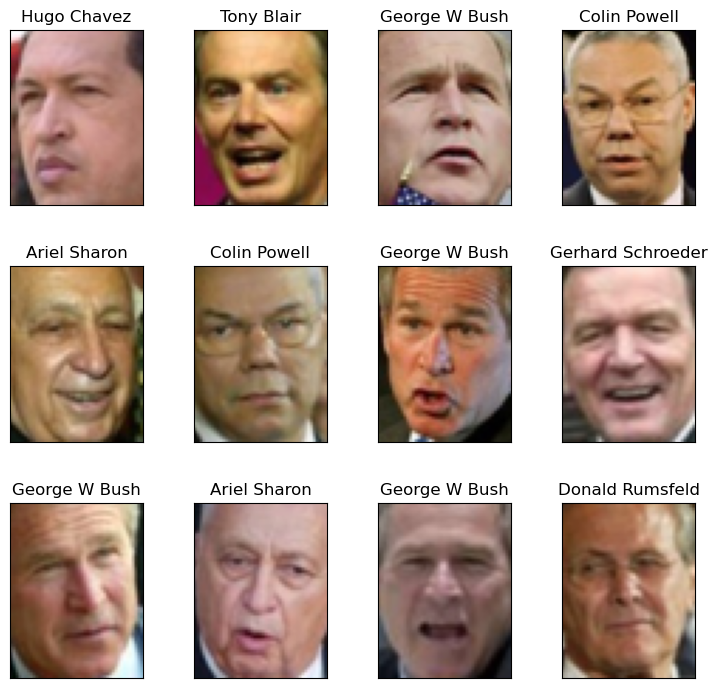

In [5]:
titles = [title(n_titulos[i], target_names) for i in range(20)]
plot_gallery(M_IMAGENES, 12 , titles, h, w)
#plt.show()

In [6]:
################### Separating the dataset into training and test data ########################
x_train, x_test, y_train, y_test = train_test_split( M_IMAGENES, n_titulos, test_size=0.20, random_state=42)

print('Training data shape : ', x_train.shape, y_train.shape)
print('Testing data shape : ', x_test.shape, y_test.shape)

#One-hot Encoding
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes) #one-hot encoding

print(x_test.shape)
print(y_test.shape)


Training data shape :  (1030, 62, 47, 3) (1030,)
Testing data shape :  (258, 62, 47, 3) (258,)
(258, 62, 47, 3)
(258, 7)


In [7]:
###############################     Algorithmic model     ##########################################
input_layer = Input( shape = x_train.shape[1:] )
conv_1 = Conv2D(32, (3, 3), activation='relu') (input_layer)
conv_2 = Conv2D(64, (3, 3), activation='relu') (conv_1)
pool_1 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
dropout_1 = Dropout(0.25) (pool_1)
flatten_1 = Flatten() (dropout_1)
dense_1 = Dense(100, activation='relu') (flatten_1)
dropout_2 = Dropout(0.25) (dense_1)
output_layer = Dense(n_classes, activation='softmax') (dropout_2)
#########################################################################################
model_conv = Model(input_layer, output_layer)

Clarification: this model uses two-dimensional convolutional layers (Conv2D) one of them has 32 kernels and the other 64. 
The kernels are the ones that recognize a feature of the image.
The MaxPooling layer allows to keep the pixel with the highest value, i.e. the value of the neuron of the output layer and thus decrease the dimension of the network.
The flatten layer "squashes/ flattens" the neurons and adjusts them to the output dimensions.

In [8]:
Adadelta_optimizer = Adadelta(learning_rate=lr, rho=0.95)
model_conv.compile(optimizer=Adadelta_optimizer, loss='categorical_crossentropy', metrics=['acc', 'mse'])
model_conv.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 62, 47, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 45, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 43, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 29, 21, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 29, 21, 64)        0         
                                                                 
 flatten (Flatten)           (None, 38976)             0         
                                                             

In [9]:
############################## Network training ##################################
start_time = time.time()

history_conv = model_conv.fit( x=x_train, 
                            y=y_train, 
                            epochs=epochs, 
                            batch_size=batch_size, 
                            validation_data=(x_test, y_test), 
                            shuffle=True, 
                            verbose=1)
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))
#########################################################################################

Epoch 1/20
33/33 [==============================] - 10s 269ms/step - loss: 1.9566 - acc: 0.3272 - mse: 0.1195 - val_loss: 1.5956 - val_acc: 0.4612 - val_mse: 0.1038
Epoch 2/20
33/33 [==============================] - 9s 272ms/step - loss: 1.7267 - acc: 0.3864 - mse: 0.1112 - val_loss: 1.5917 - val_acc: 0.4612 - val_mse: 0.1034
Epoch 3/20
33/33 [==============================] - 9s 279ms/step - loss: 1.6819 - acc: 0.4010 - mse: 0.1083 - val_loss: 1.6889 - val_acc: 0.4612 - val_mse: 0.1100
Epoch 4/20
33/33 [==============================] - 10s 296ms/step - loss: 1.5654 - acc: 0.4495 - mse: 0.1015 - val_loss: 1.3488 - val_acc: 0.5581 - val_mse: 0.0877
Epoch 5/20
33/33 [==============================] - 10s 314ms/step - loss: 1.3842 - acc: 0.4971 - mse: 0.0900 - val_loss: 1.3065 - val_acc: 0.5039 - val_mse: 0.0893
Epoch 6/20
33/33 [==============================] - 11s 338ms/step - loss: 1.1889 - acc: 0.5718 - mse: 0.0786 - val_loss: 1.5410 - val_acc: 0.3915 - val_mse: 0.1112
Epoch 7/20
3

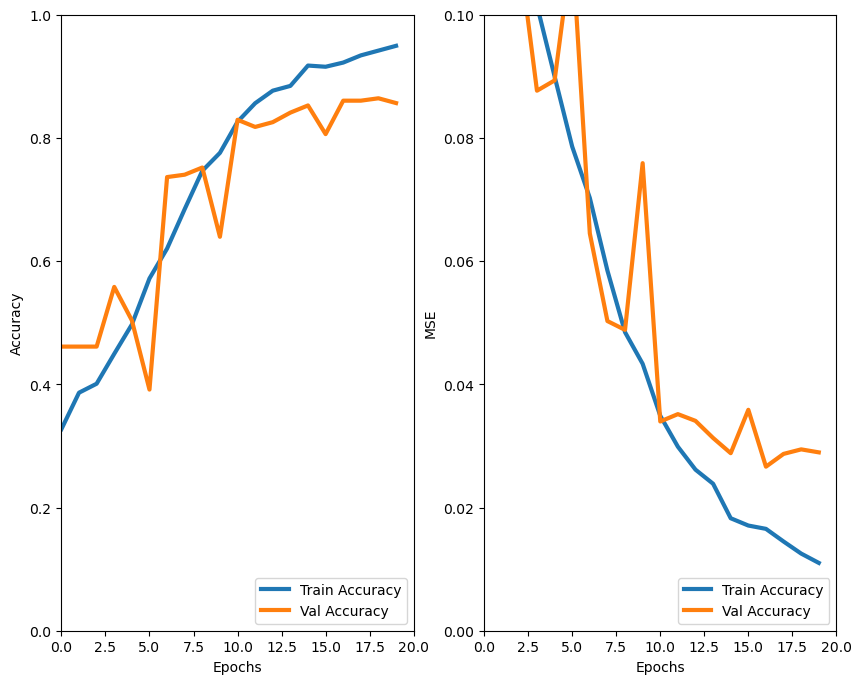

In [10]:
######################### Evaluating the training process ############################
f = plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
plt.plot(history_conv.history['acc'], linewidth=3, label='Train Accuracy')
plt.plot(history_conv.history['val_acc'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, epochs, 0, 1])
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(history_conv.history['mse'], linewidth=3, label='Train Accuracy')
plt.plot(history_conv.history['val_mse'], linewidth=3, label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.axis([0, epochs, 0, 0.1])
plt.legend(loc='lower right')

plt.show()
#########################################################################################